In [1]:
import numpy as np
import pandas as pd

from tabulate import tabulate
from IPython.core.debugger import set_trace
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')
df = df.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

display(df)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


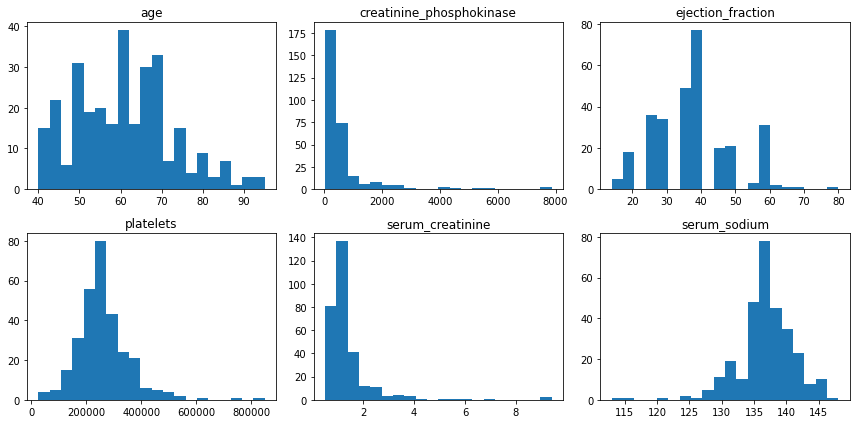

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
n_bins = 20

axes[0, 0].hist(df['age'].values, bins = n_bins)
axes[0, 0].set_title('age')

axes[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axes[0, 1].set_title('creatinine_phosphokinase')

axes[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axes[0, 2].set_title('ejection_fraction')

axes[1, 0].hist(df['platelets'].values, bins = n_bins)
axes[1, 0].set_title('platelets')

axes[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axes[1, 1].set_title('serum_creatinine')

axes[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axes[1, 2].set_title('serum_sodium')

fig.tight_layout()

plt.savefig('./img/hist-1.png')
plt.show()

In [4]:
data = df.to_numpy(dtype='float')

In [5]:
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)

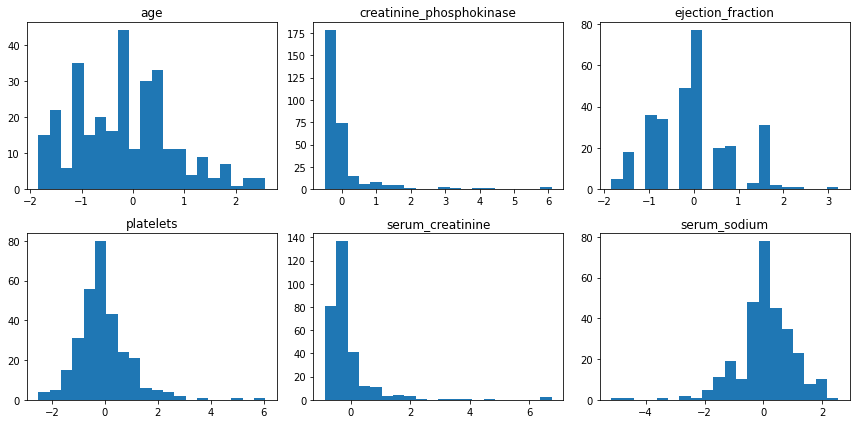

In [6]:
TITLES = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

def plot_data(data_scaled):
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))
    ax_order = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
    
    for i, ax_ind in enumerate(ax_order):
        axes[ax_ind].hist(data_scaled[:,i], bins = n_bins)
        axes[ax_ind].set_title(TITLES[i])
    
    fig.tight_layout()
    return fig

plot_data(data_scaled)
plt.savefig('./img/hist-2.png')
plt.show()

In [7]:
def calc_metrics(data):
    mean = [np.mean(col) for col in data.T]
    std = [np.std(col) for col in data.T]
    return mean, std

calc_metrics(data)

([60.83389297658862,
  581.8394648829432,
  38.08361204013378,
  263358.02926421404,
  1.3938795986622072,
  136.62541806020067],
 [11.874901429842655,
  968.6639668032415,
  11.815033462318585,
  97640.54765451424,
  1.0327786652795918,
  4.405092379513557])

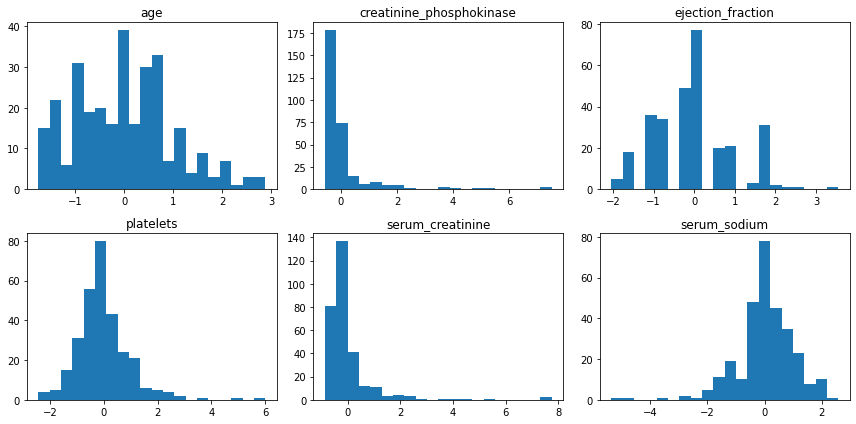

In [8]:
def shorten(s):
    if len(s) < 10:
        return s
    return s[:10] + '...'

mean_src, std_src = calc_metrics(data)
mean_sc, std_sc = calc_metrics(data_scaled)

scaler2 = preprocessing.StandardScaler()
data_scaled2 = scaler2.fit_transform(data)
mean_sc2, std_sc2 = calc_metrics(data_scaled2)

plot_data(data_scaled2)
plt.savefig('./img/hist-3.png')
plt.show()

header = ['Признак', *[shorten(t) for t in TITLES]]
table = [
    ['Среднее (исх.)', *mean_src],
    ['Среднее (стандарт. 150)', *mean_sc],
    ['Среднее (стандарт. 150 scaler)', *scaler.mean_],
    ['Среднее (стандарт. полн.)', *mean_sc2],
    ['Среднее (стандарт. полн. scaler)', *scaler2.mean_],
    ['СКО (исх)', *std_src],
    ['СКО (стандарт. 150)', *std_sc],
    ['СКО (стандарт. 150 scaler)', *[np.sqrt(v) for v in scaler.var_]],
    ['СКО (стандарт. полн.)', *std_sc2],
    ['СКО (стандарт. полн. scaler)', *[np.sqrt(v) for v in scaler2.var_]]
]

latex_t1 = tabulate(table, headers=header, tablefmt='latex_booktabs', floatfmt=".4f")
with open('./output/t1.tex', 'w') as f:
    f.write(latex_t1)

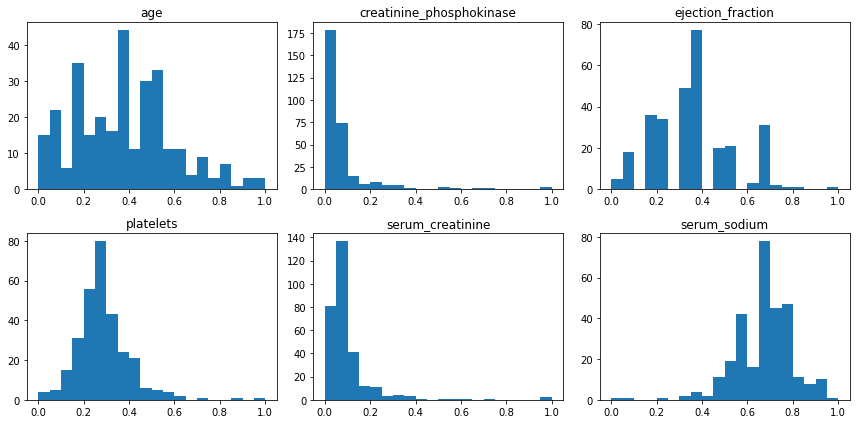

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data)
plot_data(min_max_data)

plt.savefig('./img/hist-min-max.png')
plt.show()

In [10]:
header = ['Признак', 'Минимум', 'Максимум']
table = [
    (title, min_, max_)
    for title, min_, max_ in zip(TITLES, min_max_scaler.data_min_, min_max_scaler.data_max_)
]

latex_t2 = tabulate(table, headers=header, tablefmt='latex_booktabs')
with open('./output/t2.tex', 'w') as f:
    f.write(latex_t2)

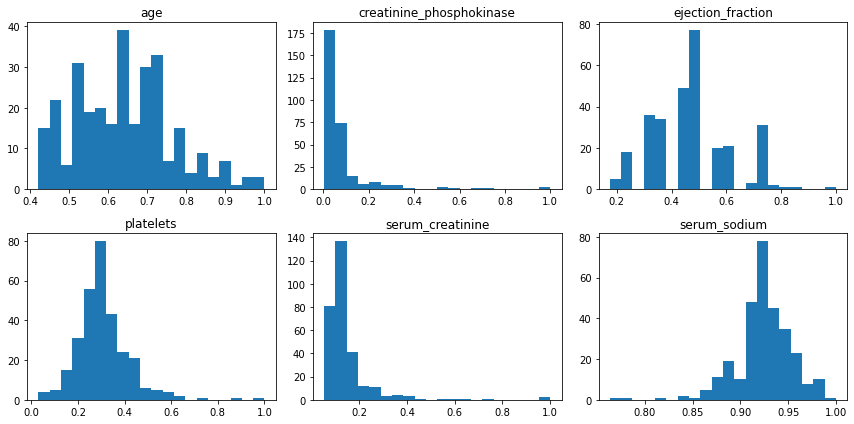

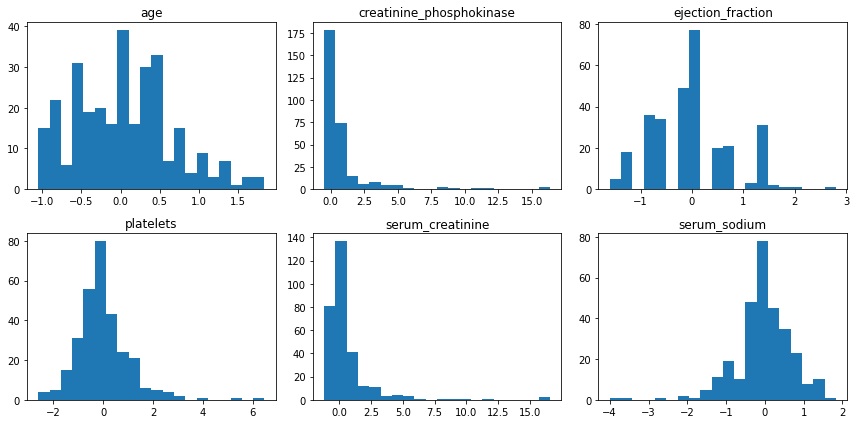

In [11]:
max_abs_data = preprocessing.MaxAbsScaler().fit_transform(data)
robust_data = preprocessing.RobustScaler().fit_transform(data)

plot_data(max_abs_data)
plt.savefig('./img/hist-max-abs.png')
plt.show()

plot_data(robust_data)
plt.savefig('./img/hist-robust.png')
plt.show()

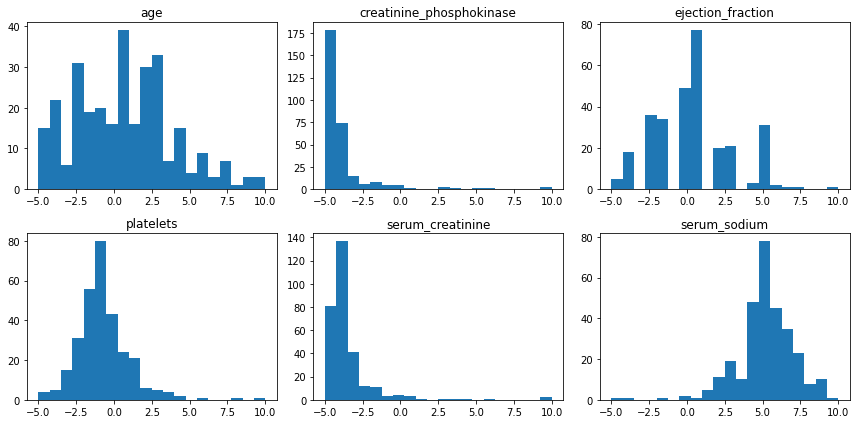

In [12]:
def fit_5_10(data):
    data = data.copy()
    for col in range(data.shape[1]):
        min_, max_ = np.min(data[:, col]), np.max(data[:, col])
        data[:, col] = [(x - min_) / (max_ - min_) * 15 - 5 for x in data[:, col]]
    return data

data_5_10 = fit_5_10(data)
plot_data(data_5_10)
plt.savefig('./img/hist-5-10.png')
plt.show()

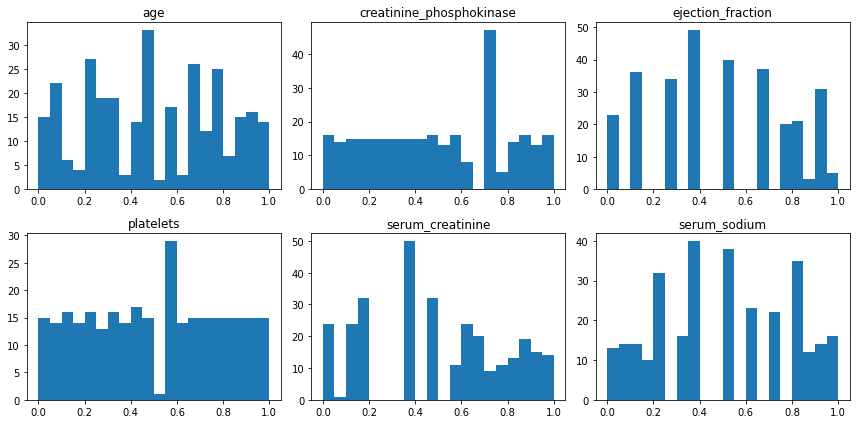

In [13]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0)
quantile_data = quantile_transformer.fit_transform(data)

plot_data(quantile_data)
plt.savefig('./img/hist-quantile.png')
plt.show()

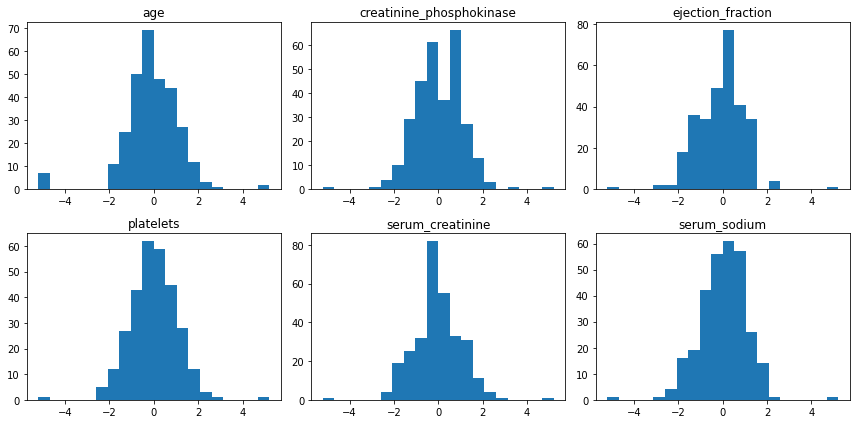

In [14]:
quantile_normal_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
quantile_normal_data = quantile_normal_transformer.fit_transform(data)

plot_data(quantile_normal_data)
plt.savefig('./img/hist-quantile-normal.png')
plt.show()

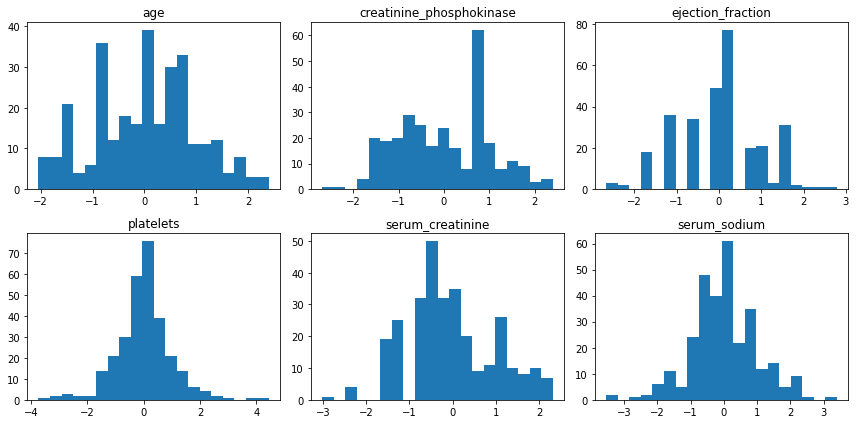

In [15]:
power_transformer = preprocessing.PowerTransformer()
power_data = power_transformer.fit_transform(data)

plot_data(power_data)
plt.savefig('./img/hist-power.png')
plt.show()

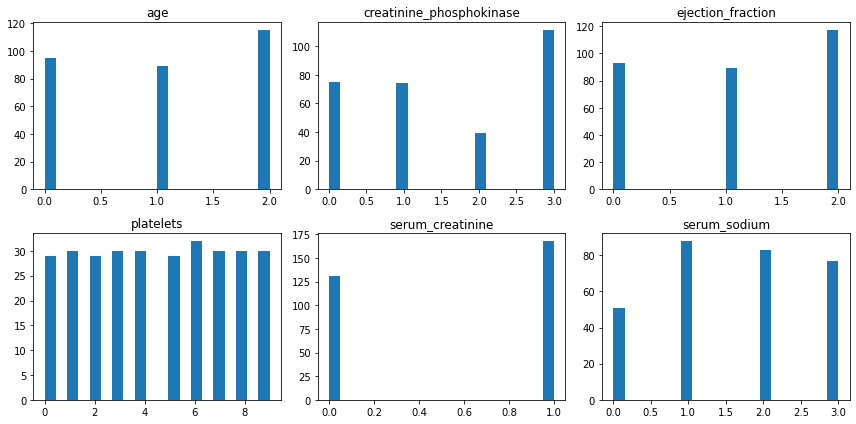

In [16]:
est = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal')
disc_data = est.fit_transform(data)

plot_data(disc_data)
plt.savefig('./img/hist-disc.png')
plt.show()